# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

1b834810628b503bb6bac94ef6e124be


## Generate Cities List

In [13]:
base_url='http://api.openweathermap.org/data/2.5/weather'

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_sp = []
record=0
#Loop to retrive all the cities information
for city in cities:
    record= record + 1
    params={'q':city, 'appid':api_key}
    try:        
        response = requests.get(base_url, params=params).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_sp.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")   
        
    # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("-----------------------------")
print("---Data Retrieval Complete---")
print("-----------------------------")

Processing Record 1 | Brae
Processing Record 2 | Atuona
Processing Record 3 | Vaini
Processing Record 4 | Busselton
City not found. Skipping...
Processing Record 6 | Port Alfred
Processing Record 7 | King City
Processing Record 8 | Gayeri
Processing Record 9 | Hermanus
City not found. Skipping...
Processing Record 11 | Klaksvik
Processing Record 12 | Dunedin
Processing Record 13 | Castro
Processing Record 14 | Obo
Processing Record 15 | Torbay
Processing Record 16 | Pishin
Processing Record 17 | Te Anau
Processing Record 18 | Saint George
Processing Record 19 | Luderitz
Processing Record 20 | Kapaa
City not found. Skipping...
Processing Record 22 | Puerto Ayora
Processing Record 23 | Esperance
Processing Record 24 | Butaritari
Processing Record 25 | Esso
City not found. Skipping...
Processing Record 27 | Marabu
Processing Record 28 | Codrington
Processing Record 29 | Aykhal
Processing Record 30 | Kon Tum
Processing Record 31 | Berlevag
Processing Record 32 | Aasiaat
Processing Record 3

Processing Record 252 | Oranjemund
Processing Record 253 | Norman Wells
Processing Record 254 | Port Pirie
Processing Record 255 | Grand-Santi
Processing Record 256 | San Patricio
Processing Record 257 | Ponta Delgada
Processing Record 258 | Cap Malheureux
Processing Record 259 | Imbituva
City not found. Skipping...
Processing Record 261 | Moron
Processing Record 262 | Sampit
Processing Record 263 | Tyup
Processing Record 264 | Sydney Mines
Processing Record 265 | Varena
Processing Record 266 | Luau
City not found. Skipping...
Processing Record 268 | Cherskiy
Processing Record 269 | Ixtapa
City not found. Skipping...
Processing Record 271 | Wenzhou
City not found. Skipping...
Processing Record 273 | Leh
Processing Record 274 | Lompoc
Processing Record 275 | La Ronge
Processing Record 276 | Necochea
Processing Record 277 | Kaeo
Processing Record 278 | KwaDukuza
Processing Record 279 | Portree
Processing Record 280 | Guerrero Negro
Processing Record 281 | Mogadishu
Processing Record 282 

Processing Record 502 | Kununurra
Processing Record 503 | Prince Rupert
Processing Record 504 | Pitimbu
Processing Record 505 | Yerbogachen
Processing Record 506 | Baiyin
Processing Record 507 | Wanning
Processing Record 508 | San Antonio
Processing Record 509 | Winnemucca
Processing Record 510 | Saint George's
City not found. Skipping...
City not found. Skipping...
Processing Record 513 | Haines Junction
Processing Record 514 | 'Ewa Beach
Processing Record 515 | Ust'-Koksa
City not found. Skipping...
Processing Record 517 | Sanjwal
Processing Record 518 | Qeshm
City not found. Skipping...
Processing Record 520 | Tromso
Processing Record 521 | Flin Flon
Processing Record 522 | Baker City
Processing Record 523 | Ekhabi
Processing Record 524 | Dryden
City not found. Skipping...
Processing Record 526 | Pozo Colorado
Processing Record 527 | Smithers
Processing Record 528 | Fredericksburg
Processing Record 529 | San Borja
Processing Record 530 | Matagami
Processing Record 531 | Nemuro
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create a dictonary with the lists generated
weather_dict = {  "City": city_name, "Cloudiness":cloudiness, 
    "Country":country, "Date":date, "Humidity": humidity,    "Lat":lat, 
    "Lng":lng, "Max Temp": max_temp, "Wind Speed":wind_sp }

# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [16]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Brae,98,GB,1579405648,81,60.40,-1.35,280.15,7.20
1,Atuona,50,PF,1579405649,75,-9.80,-139.03,300.53,7.70
2,Vaini,75,TO,1579405650,74,-21.20,-175.20,302.15,8.20
3,Busselton,0,AU,1579405651,20,-33.65,115.33,302.04,1.32
4,Port Alfred,100,ZA,1579405653,80,-33.59,26.89,292.59,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

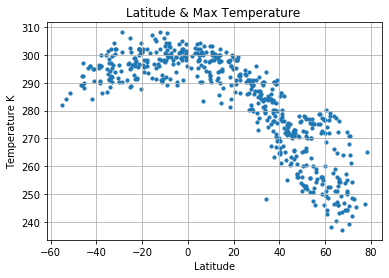

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude & Max Temperature " )

plt.xlabel("Latitude")
plt.ylabel("Temperature K")
plt.grid(True)

# Save the figure
plt.savefig("graphs/Max_Temp&Lat.png")
plt.show()

#### Latitude vs. Humidity Plot

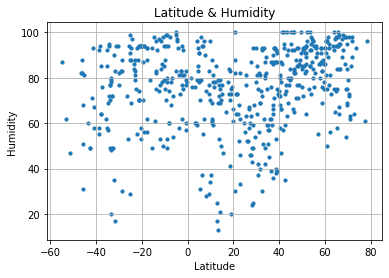

In [22]:
#Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude & Humidity")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("graphs/Max_Temp&Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

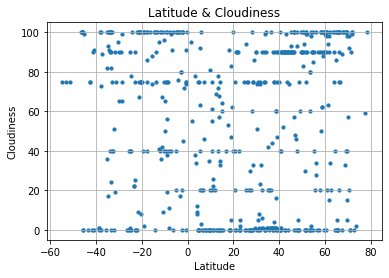

In [23]:
#Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude & Cloudiness")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("graphs/Max_Temp&Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

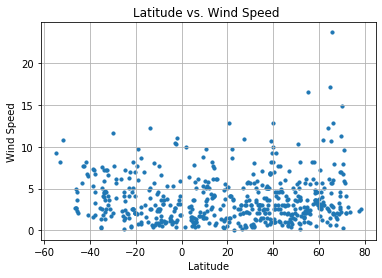

In [24]:
#Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed " )

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("graphs/Max_Temp&Wind Speed.png")
plt.show()

# OBSERVATION

Based on my observation, there are strong negative relationship between Latitude and Temperature. As we see in the graph, as latitude goes up, temperature drops. There is no relationship between latitude and cloudiness. Finally, it seems like there are some positive relationship between humidity and latitude. with this observation it is hard to come to conclusion that if they really related to each other or not. In order to improve our observation, we should look some other geological variables, such as altitude and/or other variables.